In [15]:
import pandas as pd
import os
import subprocess

In [121]:
import subprocess

# Run the shell command and capture the output
command = "grep '^#CHROM' Galaxy19-[bcftools_view_on_data_15].vcf | cut -f10-"
result = subprocess.check_output(command, shell=True, text=True)

# Split the output by whitespace to create a list of sample names
sample_names = result.strip().split()

In [122]:
vcf = 'Galaxy19-[bcftools_view_on_data_15].vcf'
df = pd.read_csv(vcf, sep='\t', comment='#',names = range(2557))
columns = ['CHROM', 'POS','ID', 'REF', 'ALT', 'QUAL', 'FILTER', 'INFO', 'FORMAT']
df.columns = (columns + sample_names)

In [183]:
df.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,AF,Variant_Type
0,19,40991288,.,G,A,.,PASS,AC=2;AN=5096;DP=279374;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.00,SNP
1,19,40991351,.,T,C,.,PASS,AC=10;AN=5096;DP=438382;AF=0;EAS_AF=0;EUR_AF=0...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.00,SNP
2,19,40991359,.,C,A,.,PASS,AC=1;AN=5096;DP=443838;AF=0;EAS_AF=0;EUR_AF=0;...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.00,SNP
3,19,40991367,.,A,T,.,PASS,AC=19;AN=5096;DP=444522;AF=0;EAS_AF=0;EUR_AF=0...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.00,SNP
4,19,40991369,.,C,T,.,PASS,AC=247;AN=5096;DP=443409;AF=0.05;EAS_AF=0.05;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0.05,SNP


In [124]:
df.shape

(1306, 2557)

In [125]:
df['AF'] = df['INFO'].str.extract(r'AF=([\d\.]+)').astype(float)

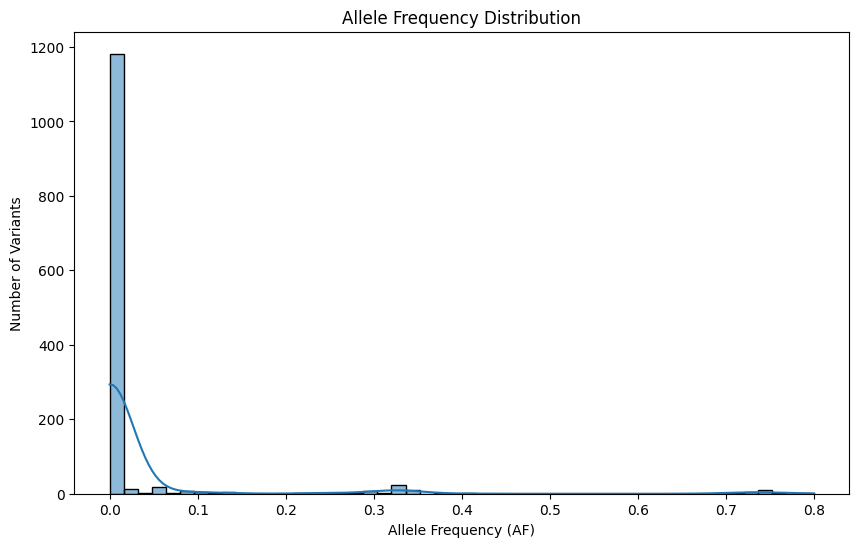

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(df['AF'].dropna(), bins=50, kde=True)
plt.title('Allele Frequency Distribution')
plt.xlabel('Allele Frequency (AF)')
plt.ylabel('Number of Variants')
plt.show()

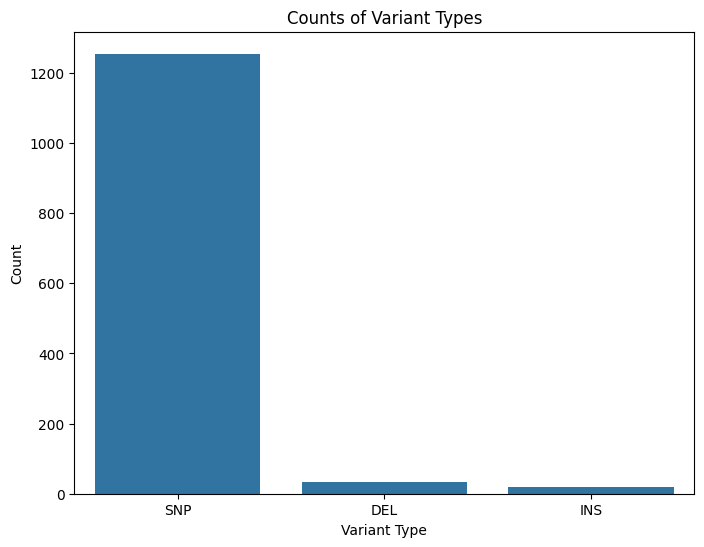

In [127]:
# Determine variant types based on REF and ALT lengths
df['Variant_Type'] = df.apply(lambda x: 'SNP' if len(x['REF']) == len(x['ALT']) == 1 else
                              'DEL' if len(x['REF']) > len(x['ALT']) else
                              'INS', axis=1)

# Plot the counts of each variant type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Variant_Type', order=['SNP', 'DEL', 'INS'])
plt.title('Counts of Variant Types')
plt.xlabel('Variant Type')
plt.ylabel('Count')
plt.show()


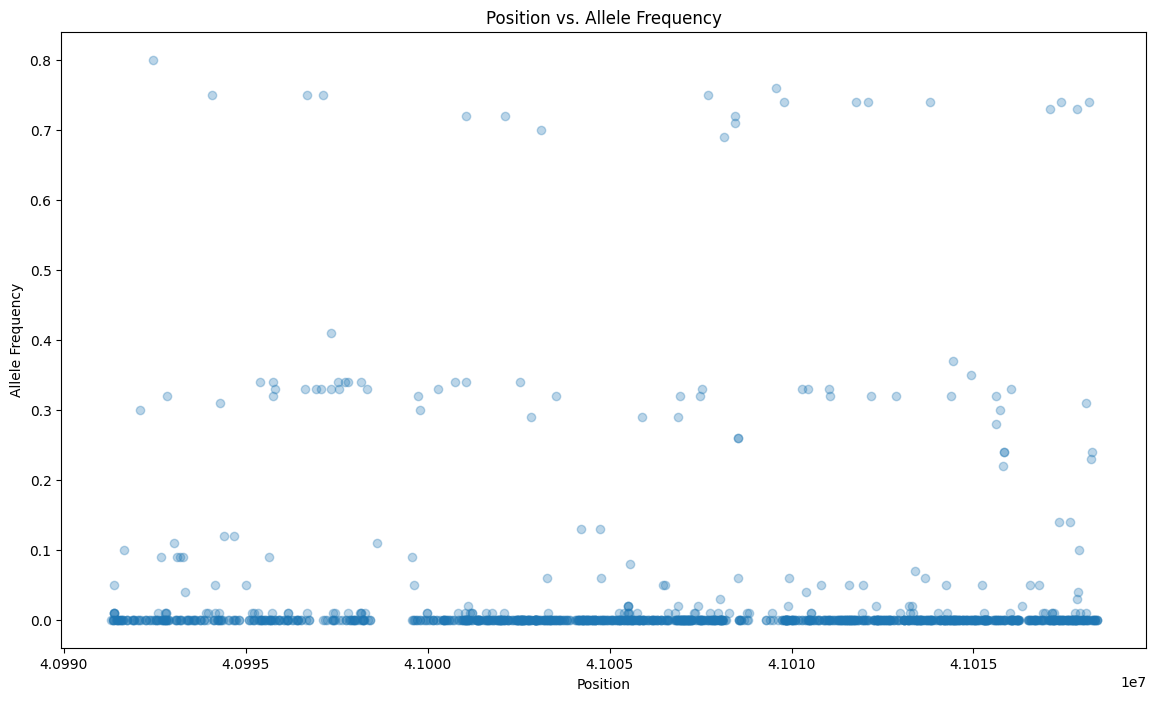

In [128]:
plt.figure(figsize=(14, 8))
plt.scatter(df['POS'], df['AF'], alpha=0.3)
plt.title('Position vs. Allele Frequency')
plt.xlabel('Position')
plt.ylabel('Allele Frequency')
plt.show()

In [129]:
df_cyp = pd.read_excel('CYP2B6_allele_definition_table.xlsx')

/Users/baiyunbing/opt/anaconda3/envs/open_ai/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [182]:
df_cyp.head()

,Gene:CYP2B6,40991224,40991367,40991369,40991381,40991388,40991390,40991391,40991441,41004015,...,41012740,41012803,41016652,41016679,41016726,41016741,41016778,41016805,41016810,n
0,Nucleotide change per gene from https://www.ph...,-82T>C,62A>T,64C>T,76A>T,83A>G,85C>A,86G>C,136A>G,12710T>A,...,21435G>A,21498C>A,25347G>A,25374G>A,25421A>G,25436G>A,25473G>A,25500A>T,25505C>A; 25505C>T,Structural Variation
1,Effect on protein (NP_000758.1),NaN,p.Q21L,p.R22C,p.T26S,p.D28G,p.R29S,p.R29P,p.M46V,p.Y62X,...,p.A407T,p.P428T,p.R434Q,p.R443H,p.M459V,p.A464T,p.G476D,p.Q485L,p.R487S; p.R487C,NaN
2,Position at NC_000019.10 (Homo sapiens chromos...,g.40991224T>C,g.40991367A>T,g.40991369C>T,g.40991381A>T,g.40991388A>G,g.40991390C>A,g.40991391G>C,g.40991441A>G,g.41004015T>A,...,g.41012740G>A,g.41012803C>A,g.41016652G>A,g.41016679G>A,g.41016726A>G,g.41016741G>A,g.41016778G>A,g.41016805A>T,g.41016810C>A; g.41016810C>T,NaN
3,Position at NG_007929.1 (CYP2B6 RefSeqGene),g.4926T>C,g.5069A>T,g.5071C>T,g.5083A>T,g.5090A>G,g.5092C>A,g.5093G>C,g.5143A>G,g.17717T>A,...,g.26442G>A,g.26505C>A,g.30354G>A,g.30381G>A,g.30428A>G,g.30443G>A,g.30480G>A,g.30507A>T,g.30512C>A; g.30512C>T,NaN
4,rsID,rs34223104,rs34883432,rs8192709,rs33973337,rs33980385,rs33926104,rs34284776,rs35303484,rs281864907,...,rs193922918,rs35010098,rs764288403,rs374099483,rs3211369,rs117872433,rs564083989,NaN,rs3211371,NaN


In [131]:
columns = ['Gene:CYP2B6']
for i in df_cyp.iloc[2][1:]:
    position = str(i)[2:10]
    columns.append(position)

In [132]:
df_cyp.columns = columns

In [133]:
df_cyp1 = df_cyp.iloc[6:].reset_index(drop = True)

In [134]:
for col in df_cyp1.columns:
    df_cyp1[col].fillna(df_cyp1[col].iloc[0], inplace=True)

In [135]:
df_cyp1 = df_cyp1.iloc[:,:-1]


In [136]:
cyp_positions = list(df_cyp1.columns[1:])
cyp_positions = [int(item) for item in cyp_positions]

In [137]:
sample_positions = list(df['POS'])


In [138]:
len(cyp_positions)


47

In [139]:
len(sample_positions)


1306

In [140]:
len(set(cyp_positions) & set(sample_positions))


29

In [141]:
shared_positions = sorted(list(set(cyp_positions) & set(sample_positions)))

In [142]:
shared_positions

[40991367,
 40991369,
 40991381,
 40991388,
 40991390,
 40991391,
 40991441,
 41004125,
 41004158,
 41004303,
 41004377,
 41004380,
 41004381,
 41006919,
 41006923,
 41006936,
 41006967,
 41007013,
 41010006,
 41010088,
 41012316,
 41012339,
 41012471,
 41012478,
 41012693,
 41016726,
 41016741,
 41016778,
 41016810]

In [143]:
df_working = pd.DataFrame(columns = df.columns)
for position in shared_positions:
    df_temp = df[df['POS'] == position]
    df_working = pd.concat([df_working,df_temp])


In [144]:
df_working = df_working.sort_values(by = 'POS').reset_index(drop = True)

In [181]:
df_working.head()

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,HG00096,...,NA21130,NA21133,NA21135,NA21137,NA21141,NA21142,NA21143,NA21144,AF,Variant_Type
0,19,40991367,.,A,T,.,PASS,AC=19;AN=5096;DP=444522;AF=0;EAS_AF=0;EUR_AF=0...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.00,SNP
1,19,40991369,.,C,T,.,PASS,AC=247;AN=5096;DP=443409;AF=0.05;EAS_AF=0.05;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,1|0,0|0,0.05,SNP
2,19,40991381,.,A,T,.,PASS,AC=31;AN=5096;DP=447796;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.01,SNP
3,19,40991388,.,A,G,.,PASS,AC=28;AN=5096;DP=446898;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.01,SNP
4,19,40991390,.,C,A,.,PASS,AC=27;AN=5096;DP=447345;AF=0.01;EAS_AF=0;EUR_A...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0.01,SNP


In [146]:
df_cyp_working = df_cyp1[['Gene:CYP2B6']+[str(i) for i in shared_positions]]

In [180]:
df_cyp_working.head()

,40991367,40991369,40991381,40991388,40991390,40991391,40991441,41004125,41004158,41004303,...,41010088,41012316,41012339,41012471,41012478,41012693,41016726,41016741,41016778,41016810
star_name,,,,,,,,,,,,,,,,,,,,,
*1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*2,A,T,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*3,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*4,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*5,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,T


In [150]:
def construct_sample_row_12(df_working,sample):
    df_temp = df_working[['REF','ALT',sample]]
    sample_name1 = str(sample)+'_1'
    sample_row1 = []
    sample_row1.append(sample_name1)
    sample_name2 = str(sample)+'_2'
    sample_row2 = []
    sample_row2.append(sample_name2)
    for _,row in df_temp.iterrows():
        first_GT = str(row[sample])[0]
        second_GT = str(row[sample])[-1]
        first_GT_name = row['REF']
        second_GT_name = row['REF']
        if first_GT == '1':
            first_GT_name = row['ALT']
        if second_GT == '1':
            second_GT_name = row['ALT']
        sample_row1.append(first_GT_name)
        sample_row2.append(second_GT_name)
    return(sample_row1,sample_row2)

In [151]:
df_sample = pd.DataFrame(columns = df_cyp_working.columns)
for i in range(9,len(df_working.columns)):
    sample = df_working.columns[i]
    sample_row1,sample_row2 = construct_sample_row_12(df_working,sample)
    df_sample.loc[len(df_sample)] = sample_row1
    df_sample.loc[len(df_sample)] = sample_row2

In [152]:
df_sample.rename(columns={"Gene:CYP2B6": "sample_name"},inplace = True)
df_sample = df_sample.set_index('sample_name')


In [153]:
df_cyp_working = df_cyp_working.rename(columns={"Gene:CYP2B6": "star_name"})
df_cyp_working = df_cyp_working.set_index('star_name')

In [179]:
df_sample.head()

,40991367,40991369,40991381,40991388,40991390,40991391,40991441,41004125,41004158,41004303,...,41010088,41012316,41012339,41012471,41012478,41012693,41016726,41016741,41016778,41016810
sample_name,,,,,,,,,,,,,,,,,,,,,
HG00096_1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
HG00096_2,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
HG00097_1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
HG00097_2,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
HG00099_1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C


In [178]:
df_cyp_working.head()

,40991367,40991369,40991381,40991388,40991390,40991391,40991441,41004125,41004158,41004303,...,41010088,41012316,41012339,41012471,41012478,41012693,41016726,41016741,41016778,41016810
star_name,,,,,,,,,,,,,,,,,,,,,
*1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*2,A,T,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*3,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*4,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*5,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,T


In [156]:
df_cyp_working_no_dup = df_cyp_working.drop_duplicates(keep = 'first')


In [177]:
df_cyp_working_no_dup.head()

,40991367,40991369,40991381,40991388,40991390,40991391,40991441,41004125,41004158,41004303,...,41010088,41012316,41012339,41012471,41012478,41012693,41016726,41016741,41016778,41016810
star_name,,,,,,,,,,,,,,,,,,,,,
*1,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*2,A,T,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*5,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,T
*6,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,C
*7,A,C,A,A,C,G,A,G,G,T,...,C,T,C,T,T,T,A,G,G,T


In [158]:
df_sample_no_index = df_sample.reset_index(drop=False)
df_cyp_working_no_index = df_cyp_working_no_dup.reset_index(drop=False)
# Create an empty list to store the results
matches = []
for i, row_sample in df_sample_no_index.iterrows():
    # For each sample row, compare it with each row in df_TPMT_working_no_dup
    for j, row_star in df_cyp_working_no_index.iterrows():
        # Check if the rows match (excluding 'sample_name' and 'star_name' columns)
        if row_sample.iloc[1:].equals(row_star.iloc[1:]):
            matches.append({'sample_name': row_sample['sample_name'], 'star_name': row_star['star_name']})
            break
df_matches = pd.DataFrame(matches)

In [159]:
df_matches.groupby('star_name').size()


star_name
*1     2799
*10      19
*11       7
*13       4
*15       9
*17      27
*18     117
*19       5
*2      207
*20       1
*23       3
*24       1
*26       5
*27       1
*28       1
*35       2
*41       1
*43       4
*45       1
*48       2
*5      256
*6     1574
*7        1
dtype: int64

In [176]:
df_matches.head()

,star_name
sample_name,
HG00096_1,*1
HG00096_2,*6
HG00097_1,*1
HG00097_2,*1
HG00099_1,*1


In [161]:
df_matches = df_matches.set_index('sample_name')


In [165]:
ls_star = []
ls_sample_name = []
for i in sample_names:
    if i+'_1' in df_matches.index:
        if i+'_2' in df_matches.index:
            ls_sample_name.append(i)
            star1 = df_matches.loc[i+'_1','star_name']
            star2 = df_matches.loc[i+'_2','star_name']
            if int(star1[1]) <= int(star2[1]):
                star = star1+'/'+star2
            else:
                star = star2+'/'+star1
            ls_star.append(star)

In [166]:
df_result = pd.DataFrame({'sample_name':ls_sample_name,'genotype':ls_star})


In [167]:
df_result.groupby('genotype').size()

genotype
*1/*1      814
*1/*10       4
*1/*11       2
*1/*15       2
*1/*17       2
*1/*18      23
*1/*19       1
*1/*2      114
*1/*23       2
*1/*24       1
*1/*26       4
*1/*27       1
*1/*28       1
*1/*35       1
*1/*43       3
*1/*45       1
*1/*48       1
*1/*5      137
*1/*6      802
*10/*1       5
*10/*11      1
*10/*2       1
*10/*5       2
*10/*6       5
*11/*1       1
*11/*18      1
*11/*5       1
*11/*6       1
*13/*6       4
*15/*1       1
*15/*10      1
*15/*5       3
*15/*6       2
*17/*1       7
*17/*18      2
*17/*2       1
*17/*6      13
*18/*1      25
*18/*18      8
*18/*2       5
*18/*20      1
*18/*5       1
*18/*6      42
*19/*1       1
*19/*2       1
*19/*6       2
*2/*2        5
*2/*26       1
*2/*5       14
*2/*6       60
*23/*6       1
*35/*6       1
*41/*6       1
*43/*6       1
*48/*6       1
*5/*5        6
*5/*6       84
*6/*6      266
*6/*7        1
dtype: int64

In [168]:
df_cyp_pheno = pd.read_excel('CYP2B6_Diplotype_Phenotype_Table.xlsx')

/Users/baiyunbing/opt/anaconda3/envs/open_ai/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [169]:
df_cyp_pheno.head()

,CYP2B6 Diplotype,Activity Score,Coded Diplotype/Phenotype Summary,EHR Priority Notation
0,*1/*1,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk
1,*1/*2,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk
2,*1/*3,NaN,CYP2B6 Indeterminate,none
3,*1/*4,NaN,CYP2B6 Rapid Metabolizer,Normal/Routine/Low Risk
4,*1/*5,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk


In [170]:
df_result.head()

,sample_name,genotype
0,HG00096,*1/*6
1,HG00097,*1/*1
2,HG00099,*1/*1
3,HG00100,*5/*6
4,HG00101,*1/*5


In [172]:
df_result_pheno = pd.merge(df_result,df_cyp_pheno,left_on = 'genotype',right_on = 'CYP2B6 Diplotype',how = 'left')

In [175]:
df_result_pheno.head()

,sample_name,genotype,CYP2B6 Diplotype,Activity Score,Coded Diplotype/Phenotype Summary,EHR Priority Notation
0,HG00096,*1/*6,*1/*6,NaN,CYP2B6 Intermediate Metabolizer,Abnormal/Priority/High Risk
1,HG00097,*1/*1,*1/*1,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk
2,HG00099,*1/*1,*1/*1,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk
3,HG00100,*5/*6,*5/*6,NaN,CYP2B6 Intermediate Metabolizer,Abnormal/Priority/High Risk
4,HG00101,*1/*5,*1/*5,NaN,CYP2B6 Normal Metabolizer,Normal/Routine/Low Risk


In [174]:
df_result_pheno.groupby('Coded Diplotype/Phenotype Summary').size()

Coded Diplotype/Phenotype Summary
CYP2B6 Indeterminate                 17
CYP2B6 Intermediate Metabolizer     981
CYP2B6 Normal Metabolizer          1092
CYP2B6 Poor Metabolizer             276
dtype: int64